In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [2]:
deaths = pd.read_csv('who_suicide_statistics.csv')

In [6]:
deaths.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


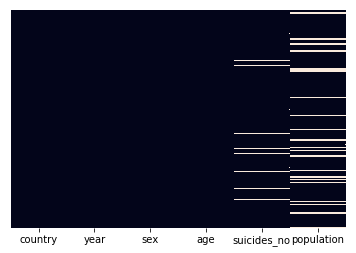

In [4]:
sns.heatmap(deaths.isnull(),yticklabels=False,cbar=False)

In [52]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
age            36060 non-null int64
suicides_no    36060 non-null float64
population     36060 non-null float64
male           36060 non-null uint8
dtypes: float64(2), int64(2), object(1), uint8(1)
memory usage: 2.9+ MB


In [56]:
deaths['suicides_no'].max()

22338.0

In [8]:
deaths.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [9]:
deaths['country'].nunique()

141

In [11]:
sex = pd.get_dummies(deaths['sex'],drop_first=True)

In [12]:
sex.head()

,male
0,0
1,0
2,0
3,0
4,0


In [13]:
deaths = pd.concat([deaths,sex],axis=1)

In [16]:
deaths.drop('sex',axis=1,inplace=True)

In [17]:
deaths.head()

,country,year,age,suicides_no,population,male
0,Albania,1985,15-24 years,NaN,277900.0,0
1,Albania,1985,25-34 years,NaN,246800.0,0
2,Albania,1985,35-54 years,NaN,267500.0,0
3,Albania,1985,5-14 years,NaN,298300.0,0
4,Albania,1985,55-74 years,NaN,138700.0,0


In [42]:
deaths['age'] = deaths['age'].apply(lambda x:int(x.split('+')[0]))

In [40]:
deaths.head()

,country,year,age,suicides_no,population,male
24,Albania,1987,15,14.0,289700.0,0
25,Albania,1987,25,4.0,257200.0,0
26,Albania,1987,35,6.0,278800.0,0
27,Albania,1987,5,0.0,311000.0,0
28,Albania,1987,55,0.0,144600.0,0


In [21]:
deaths = deaths.dropna()

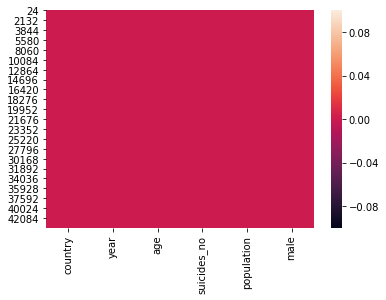

In [69]:
sns.heatmap(deaths.isnull())

In [23]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
age            36060 non-null object
suicides_no    36060 non-null float64
population     36060 non-null float64
male           36060 non-null uint8
dtypes: float64(2), int64(1), object(2), uint8(1)
memory usage: 1.7+ MB


In [24]:
deaths.head()

,country,year,age,suicides_no,population,male
24,Albania,1987,15,14.0,289700.0,0
25,Albania,1987,25,4.0,257200.0,0
26,Albania,1987,35,6.0,278800.0,0
27,Albania,1987,5,0.0,311000.0,0
28,Albania,1987,55,0.0,144600.0,0


In [44]:
X = deaths[['year','age','population','male']]

In [45]:
y = deaths['suicides_no']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [47]:
linear_model = LinearRegression()

In [48]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
predictions = linear_model.predict(X_test)

In [62]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(rmse)

582.6641257421635


In [65]:
suicides_range = deaths['suicides_no'].max() - deaths['suicides_no'].min()

In [66]:
rmse/suicides_range

0.02608398808049796